# Μάθημα 3:  Αναλογικές Είσοδοι
**Ημερομηνία:** 10/3/2025,
`Γ. Παπαλάμπρου`

## Στόχοι
- Χρήση του μετατροπέα Analog-to-Digital Converter (ADC): Διαβάζοντας αναλογικές τιμές
- Διαβάζοντας ένα ποτενσιόμετρο
- Αποθηκεύοντας δεδομένα δειγματοληψίας σε αρχείο


## Εισαγωγή
- Οι Αναλογικές είσοδοι στην πλακέτα Raspberry Pi Pico 2040/2350, https://www.raspberrypi.com/documentation/microcontrollers/pico-series.html
- Δείτε το Κεφ. 3-Physical computing από το [3], για τις συνδέσεις (pins) 
- Μελετήστε επίσης το βασικό υλικό: Breadboard, Potentiometer, Jumper wires
- Δείτε το Κεφ. 8-Temperature gauge από το [3]
- Δείτε το Κεφ. 9-Data logger από το [3]



## Σχετική Βιβλιογραφία
1. Raspberry Pi Pico Datasheet: https://www.raspberrypi.com/documentation/microcontrollers/
1. MicroPython Documentation: https://docs.micropython.org/en/latest/
1. G. Halfacree, B. Everard, Get Started with MicroPython on Raspberry Pi Pico, 2021, [free pdf](https://www.dbooks.org/get-started-with-micropython-on-raspberry-pi-pico-1912047861/#:~:text=You%20can%20download%20Get%20Started%20with%20MicroPython%20on,is%20a%20new%20low-cost%2C%20high-performance%20microcontroller%20board%20wit)


## Βασικές συνδέσεις
 - Δείτε στο Κεφ. 8-Temperature gauge από το [3], p. 93-100, συνδέσεις εξωτερικού ποτενσιόμετρου.

## Πρόγραμμα για το ποτενσιόμετρο, L3-1

### Εξαρτήματα
- Breadboard
- Potentiometer - ποτενσιόμετρο (και ένα λεπτό ίσιο κατσαβίδι)
- Jumper wires

### Συνδέσεις
Το αρχείο L3-1.png περιλαμβάνει τις συνδέσεις των εξαρτημάτων, όπως δείχνει η παρακάτω εικόνα.

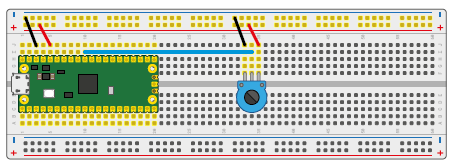

Δείτε την χρήση του μετατροπέα σήματος από αναλογικό σε ψηφιακό - analogue-to-digital converter (A/D) στο [3]. 

Ένα ADC έχει δύο βασικά χαρακτηριστικά: την ανάλυσή του, μετρούμενη σε ψηφιακά bits, και τα κανάλια του ή πόσα αναλογικά σήματα μπορεί να δεχτεί και να μετατρέψει ταυτόχρονα. Το ADC στο Pico έχει ανάλυση 12 bit, πράγμα που σημαίνει ότι μπορεί να μετατρέψει ένα αναλογικό σήμα σε ψηφιακό σήμα ως αριθμό που κυμαίνεται από 0 έως 4095 - αν και αυτό αντιμετωπίζεται σε MicroPython που μετατρέπεται σε αριθμό 16-bit που κυμαίνεται από 0 έως 65535, έτσι ώστε να συμπεριφέρεται το ίδιο με το ADC σε άλλους μικροελεγκτές MicroPython. 

Έχει τρία κανάλια που βγαίνουν στις ακίδες GPIO: GP26, GP27 και GP28, τα οποία είναι επίσης γνωστά ως GP26_ADC0, GP27_ADC1 και GP28_ADC2 για αναλογικά κανάλια 0, 1 και 2 αντίστοιχα. 

Υπάρχει επίσης ένα τέταρτο κανάλι ADC, το οποίο συνδέεται εσωτερικά με έναν αισθητήρα θερμοκρασίας ενσωματωμένο στο RP2040.

## Διαβάζοντας το ποτενσιόμετρο


Ο πιο κοινός τύπος έχει είτε ένα μικρό, συνήθως πλαστικό, κουμπί που βγαίνει από την κορυφή ή υπάρχει μπροστά χωνευτό: αυτό είναι γνωστό ως περιστροφικό ποτενσιόμετρο.
Πάρτε το ποτενσιόμετρο  και παρατηρείστε ότι έχει τρεις ακίδες που ταιριάζουν στο breadboard. 
Ανάλογα με το πώς συνδέετε αυτές τις ακίδες, το ποτενσιόμετρο λειτουργεί σε δύο διαφορετικές
τρόπους. 

Ξεκινήστε εισάγοντας το ποτενσιόμετρο στο breadboard σας, προσέχοντας να μην λυγίσετε τα pins. 
Συνδέστε το μεσαίο pin στο GP26_ADC0 στο Pico σας χρησιμοποιώντας έναν βραχυκυκλωτήρα αρσενικό σε αρσενικό (M2M). Τέλος, πάρτε δύο ακόμη καλώδια βραχυκυκλωτήρα και συνδέστε ένα από τα εξωτερικά pins του ποτενσιόμετρου-δεν έχει σημασία ποια-στη ράγα ισχύος του breadboard σας και την ράγα ισχύος στο δικό σας 3V3 του Pico και το άλλο από τα εξωτερικά pins στην γείωση (GND).

In [43]:
%serialconnect

Connecting to --port=COM9 --baud=115200 
Ready.


In [44]:
import machine
import utime

Ο παρακάτω κώδικας ρυθμίζει το pin GP26_ADC0 ως το πρώτο κανάλι, ADC0, του μετατροπέα analogue-to-digital.

In [45]:
potentiometer = machine.ADC(26)

Για ανάγνωση από το pin αυτό, δημιουργείστε τον βρόχο-loop while True: 

In [46]:
while True:
    print(potentiometer.read_u16())
    utime.sleep(2)

23509
23381
23461


*** Sending Ctrl-C



Traceback (most recent call last):
  File "<stdin>", line 3, in <module>
KeyboardInterrupt: 


Ο παρακάτω κώδικας δημιουργεί έναν μαθηματικό τρόπο μετατροπής του αριθμού που σας δίνει ο μετατροπέας αναλογικού σε ψηφιακό σε μια (σχετικά) ακριβή προσέγγιση της πραγματικής τάσης που αντιπροσωπεύει. Ο πρώτος αριθμός είναι η μέγιστη δυνατή τάση που μπορεί να περιμένει το pin, δηλ. 3.3 V, από τον ακροδέκτη 3V3 του Pico σας. Ο δεύτερος αριθμός είναι η μέγιστη τιμή που μπορεί να είναι η αναλογική ένδειξη εισόδου, ίση με 65535.

In [15]:
conversion_factor = 3.3 / (65535)

In [16]:
while True:
    voltage = potentiometer.read_u16() * conversion_factor
    print(voltage)
    utime.sleep(2)

0.6801419
0.6777248
0.6785305
0.6753078
.3.181566
3.27019
2.092039
.0.9436484
1.175734
1.180568
.1.174122
1.175734
1.176539
1.177345
.1.174928
1.177345
1.174122
.1.18379
1.178151
1.175734
.1.175734
1.184596
1.182179
1.178151
.1.175734
1.176539
1.181373
.1.180568
1.176539
1.173316
.1.174928
1.179762
1.184596
1.180568
.

*** Sending Ctrl-C

.174928


Traceback (most recent call last):
  File "<stdin>", line 4, in <module>
KeyboardInterrupt: 


## Μετρώντας θερμοκρασία, L3-2.py

### Εξαρτήματα
- Breadboard με RP Pico 
- (Ενσωματωμένο αισθητήριο θεεμοκρασίας)

In [47]:
%serialconnect

Connecting to --port=COM9 --baud=115200 
Ready.


In [48]:
import machine
import utime

In [50]:
sensor_temp = machine.ADC(4)

In [52]:
conversion_factor = 3.3 / (65535)

In [53]:
while True:
    reading = sensor_temp.read_u16() * conversion_factor
    temperature = 27 - (reading - 0.706)/0.001721
    print(temperature)
    utime.sleep(2)

20.95853
21.89482
21.42667
20.95853
.21.42667


*** Sending Ctrl-C



Traceback (most recent call last):
  File "<stdin>", line 5, in <module>
KeyboardInterrupt: 


## Το ίδιο πρόγραμμα σε Visual Code Studio, picoL3-2.py
- Δώστε CTRL+SHIFT+P για να γίνει η σύνδεση του VCS με το RP Pico. Τότε στο κάτω toolbar του VCS θα γράφεται `Pico Connected`. Επίσης όταν χάνεται η σύνδεση ΗΥ-Pico θα πρέπει να επανασυνδέσετε το Pico.
- Για να τρέξετε ένα πρόγραμμα σε Micropython, θα δώσετε  στο κάτω toolbar του VCS `Run`. Για τον τερματισμό θα δώσετε `Stop`.

In [37]:
"""
Usea A/D and read the onboard temperature sensor
in RP2040

GP, 3/10/25
File: picoL3-2.py
"""

import machine
import utime

sensor_temp = machine.ADC(4)
conversion_factor = 3.3 / (65535)

while True:
    reading = sensor_temp.read_u16() * conversion_factor
    temperature = 27 - (reading - 0.706)/0.001721
    print(temperature)
    utime.sleep(2)

22.36296
21.42667
21.89482


*** Sending Ctrl-C



Traceback (most recent call last):
  File "<stdin>", line 19, in <module>
KeyboardInterrupt: 


## Data logger


Μετατρέψτε το Raspberry Pi Pico σε 
συσκευή καταγραφής δεδομένων θερμοκρασίας (data logger) και αποσυνδέστε το από
τον υπολογιστή για να γίνει πλήρως φορητή συσκευή.

Για περισσότερα στοιχεία δείτε από το [3] το Κεφ. 9 - Data logger, p. 104-114.

## Το σύστημα αρχείων

Το σύστημα αρχείων είναι όπου το Pico σας αποθηκεύει όλα τα προγράμματα που έχετε γράψει. Είναι ισοδύναμο σε
λειτουργία στην κάρτα microSD  ή στον σκληρό δίσκο  στο δικό σας
φορητό ή επιτραπέζιο υπολογιστή: είναι μια μορφή μη πτητικής αποθήκευσης, πράγμα που σημαίνει ότι ό,τι και αν
αποθήκευσει εκεί παραμένει στη θέση του ακόμα και όταν αποσυνδέετε το καλώδιο micro USB του Pico.

## Μεταφορά αρχείων δειγματοληψίας στον ΗΥ σας
- Η διαχείριση αρχείων σε ένα RP Pico γίνεται με  το εργαλείο  `ampy` (Adafruit MicroPython Tool) σε ένα παράθυρο PowerShell (Windows10/11),  <span style="color: red">   ΑΦΟΥ ΠΡΩΤΑ έχετε διακόψει άλλη επικοινωνία με το Pico (πχ σύνδεση με Jupyter, VCS κλπ) </span>
- Για Windows10/11, με τον Device Manager-Ports θα βρείτε την USB Serial Device, πχ COM9
- Για να δείτε τα αρχεία στο RP Pico: `ampy --port COM9 ls`
- Για να λάβετε ένα αρχείο από το RP Pico στον ΗΥ σας: `ampy --port COM9 get data49on.csv > data49on.csv`
- Για να σβύσετε ένα αρχείο από το RP Pico: `ampy --port COM8 rm file-to-remove.py`
- Γενική βοήθεια: `ampy --help`

## Logging temperatures, L3-3.py

In [39]:
import machine
import utime
sensor_temp = machine.ADC(machine.ADC.CORE_TEMP)

sensor_temp = machine.ADC(machine.ADC.CORE_TEMP)

conversion_factor = 3.3 / (65535)

file = open("temps.txt", "w")

while True:
    reading = sensor_temp.read_u16() * conversion_factor
    temperature = 27 - (reading - 0.706)/0.001721
    file.write(str(temperature))
    file.flush()
    utime.sleep(10)

...

*** Sending Ctrl-C



Traceback (most recent call last):
  File "<stdin>", line 16, in <module>
KeyboardInterrupt: 


## Εκτύπωση γραφημάτων
Αφού έχετε μεταφέρει στον ΗΥ σας από το RP Pico το αρχείο με τις μετρήσεις, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη της Python Matplotlib για να κάνετε τα γραφήματα με τις μεταβολές των μεγεθών.


## Επόμενα Βήματα
- Δείτε από το [3] τα XXXXXXXXXXXXX